In [11]:
%pwd

'c:\\Users\\Admin\\Desktop\\HUST.AI.Project\\Age-Gender-Prediction'

In [1]:
%pip install -r "requirements.txt"

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis

In [2]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, \
    Dropout, Flatten, Dense, Activation, \
    BatchNormalization
from keras import backend as K
from sklearn.model_selection import train_test_split

In [4]:
# dimensions of our images.
img_width, img_height = 128, 128
img_channels = 3
Image_Size = (img_width, img_height)

In [5]:
if K.image_data_format() == 'channels_first':
    input_shape = (img_channels, img_width, img_height)
else:
    input_shape = (img_width, img_height, img_channels)

In [6]:
data_dir = './data/UTKFace'

filenames = os.listdir(data_dir)
ages = []
genders = []
for file_name in filenames:
    age = file_name.split("_")[0]
    ages.append(int(age))

    gender = file_name.split("_")[1]
    if gender == '0':
        genders.append("male")
    else:
        genders.append('female')

df = pd.DataFrame({
    'filename': filenames,
    'age': ages,
    'gender': genders
})


In [7]:
df.head()

,filename,age,gender
0,100_0_0_20170112213500903.jpg.chip.jpg,100,male
1,100_0_0_20170112215240346.jpg.chip.jpg,100,male
2,100_1_0_20170110183726390.jpg.chip.jpg,100,female
3,100_1_0_20170112213001988.jpg.chip.jpg,100,female
4,100_1_0_20170112213303693.jpg.chip.jpg,100,female


<AxesSubplot:>

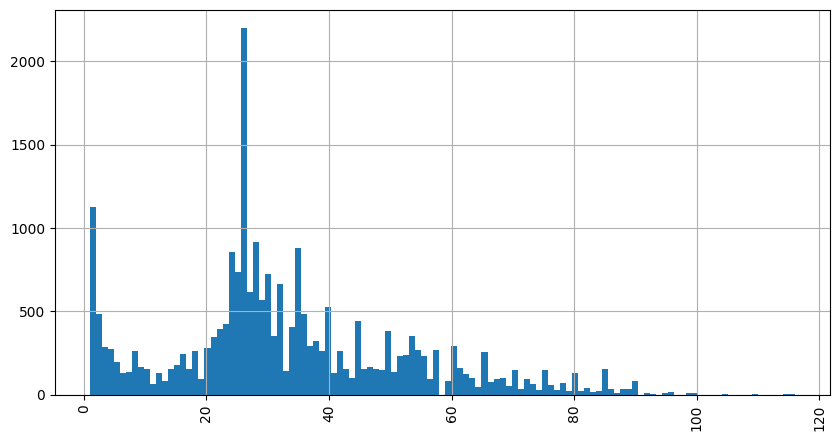

In [17]:
# histogram of df
df['age'].hist(bins=117, figsize=(10, 5), xrot=90)

<AxesSubplot:>

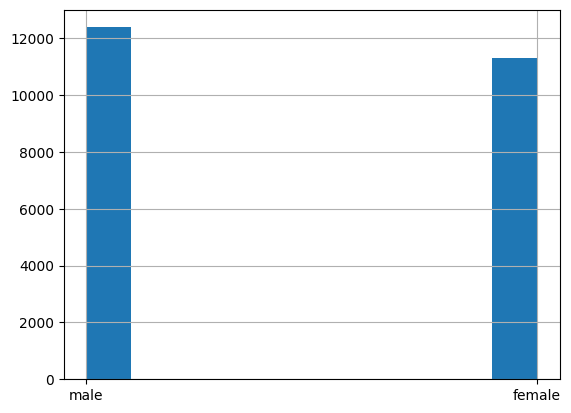

In [18]:
# histogram of df
df['gender'].hist()

In [19]:
# looking data
sample = np.random.randint(len(df))

img_path = data_dir + "/" + df['filename'][sample]
age = df['age'][sample]
gender = df['gender'][sample]

img = Image.open(img_path)

plt.imshow(img)
plt.title(f"Class: {age}-{gender}")
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/UTKFace/28_1_1_20170116013959188.jpg.chip.jpg'

# Training Model

In [ ]:
data_dir = 'data/UTKFace/'

filenames = os.listdir(data_dir)
ages = []
genders = []
for file_name in filenames:
    age = file_name.split("_")[0]
    ages.append(int(age))

    gender = file_name.split("_")[1]
    genders.append(int(gender))

df = pd.DataFrame({
    'filename': filenames,
    'age': ages,
    'gender': genders
})

df

,filename,age,gender
0,100_0_0_20170112213500903.jpg.chip.jpg,100,0
1,100_0_0_20170112215240346.jpg.chip.jpg,100,0
2,100_1_0_20170110183726390.jpg.chip.jpg,100,1
3,100_1_0_20170112213001988.jpg.chip.jpg,100,1
4,100_1_0_20170112213303693.jpg.chip.jpg,100,1
...,...,...,...
23703,9_1_3_20161220222856346.jpg.chip.jpg,9,1
23704,9_1_3_20170104222949455.jpg.chip.jpg,9,1
23705,9_1_4_20170103200637399.jpg.chip.jpg,9,1
23706,9_1_4_20170103200814791.jpg.chip.jpg,9,1


In [ ]:
%pip install tqdm

     -------------------------------------- 78.5/78.5 kB 620.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tqdm import tqdm
from PIL import Image, ImageOps

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(data_dir + image, grayscale=False)
        img = img.resize((64, 64), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    # features = features.reshape(len(features), 128, 128, 3)
    return features

In [ ]:
X = extract_features(df['filename'])

  0%|          | 0/23708 [00:00<?, ?it/s]c:\Users\Admin\miniconda3\envs\ai_prj\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  
100%|██████████| 23708/23708 [04:35<00:00, 86.17it/s] 


In [ ]:
# Normalize the images
X = X / 255.0

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [ ]:
from tensorflow.keras import Input, Model

input = Input(shape=(64,64,3))
conv1 = Conv2D(140,(3,3),activation="relu")(input)
conv2 = Conv2D(130,(3,3),activation="relu")(conv1)
batch1 = BatchNormalization()(conv2)
pool3 = MaxPool2D((2,2))(batch1)
conv3 = Conv2D(120,(3,3),activation="relu")(pool3)
batch2 = BatchNormalization()(conv3)
pool4 = MaxPool2D((2,2))(batch2)
flt = Flatten()(pool4)
#age
age_l = Dense(128,activation="relu")(flt)
age_l = Dense(64,activation="relu")(age_l)
age_l = Dense(32,activation="relu")(age_l)
age_l = Dense(1,activation="relu")(age_l)
#gender
gender_l = Dense(128,activation="relu")(flt)
gender_l = Dense(80,activation="relu")(gender_l)
gender_l = Dense(64,activation="relu")(gender_l)
gender_l = Dense(32,activation="relu")(gender_l)
gender_l = Dropout(0.5)(gender_l)
gender_l = Dense(2,activation="softmax")(gender_l)

model = Model(inputs=input,outputs=[age_l,gender_l])
model.compile(optimizer="adam",loss=["mse","sparse_categorical_crossentropy"],metrics=['mae','accuracy'])
save = model.fit(x_train,[y_train,y_train_2],validation_data=(x_test,[y_test,y_test_2]),epochs=50)
model.save("model.h5")

In [ ]:
from tensorflow.keras import Input, Model

input_shape = (64, 64, 3)

inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)
conv_5 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_4)
maxp_5 = MaxPooling2D(pool_size=(2, 2)) (conv_5)

flatten_age = Flatten() (maxp_5)
# 1096
flatten_gender = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(128, activation='relu') (flatten_gender)
dense_2 = Dense(128, activation='relu') (flatten_age)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

# gender
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
# age
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

# mae = mean square error
model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 62, 62, 32)   896         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 31, 31, 32)  0           ['conv2d_9[0][0]']               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 29, 29, 64)   18496       ['max_pooling2d_8[0][0]']        
                                                                                              

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
# Train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 98s 159ms/step - loss: 11.5240 - gender_out_loss: 0.6449 - age_out_loss: 10.8792 - gender_out_accuracy: 0.6181 - age_out_accuracy: 0.0591 - val_loss: 33.8754 - val_gender_out_loss: 0.5666 - val_age_out_loss: 33.3088 - val_gender_out_accuracy: 0.7153 - val_age_out_accuracy: 0.0000e+00
Epoch 2/30
593/593 [==============================] - 93s 157ms/step - loss: 8.8537 - gender_out_loss: 0.4803 - age_out_loss: 8.3735 - gender_out_accuracy: 0.7696 - age_out_accuracy: 0.0432 - val_loss: 31.5003 - val_gender_out_loss: 0.4902 - val_age_out_loss: 31.0101 - val_gender_out_accuracy: 0.7623 - val_age_out_accuracy: 0.0000e+00
Epoch 3/30
593/593 [==============================] - 79s 133ms/step - loss: 7.6309 - gender_out_loss: 0.4007 - age_out_loss: 7.2302 - gender_out_accuracy: 0.8127 - age_out_accuracy: 0.0159 - val_loss: 29.4990 - val_gender_out_loss: 0.4647 - val_age_out_loss: 29.0343 - val_gender_out_accuracy: 0.7832 - val_age_out_accuracy

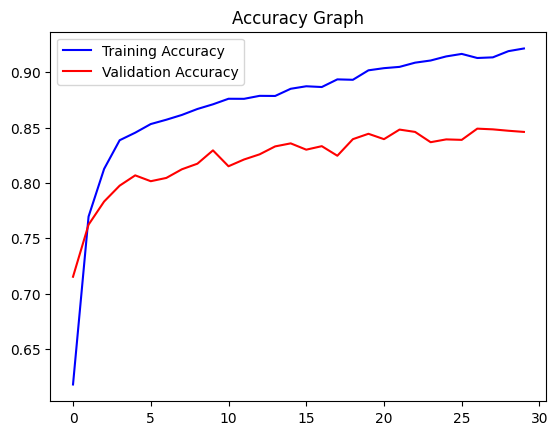

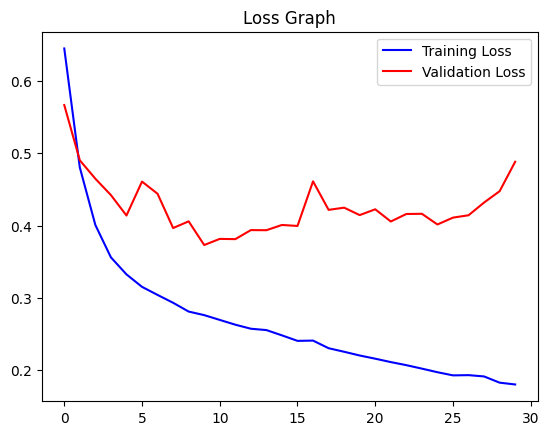

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

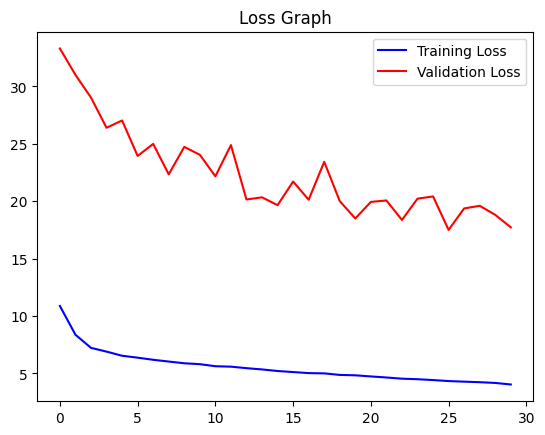

In [ ]:
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
model.save("checkpoints/model.h5")

1/1 [==============================] - 0s 31ms/step
Original Gender: Male, Original Age: 10
Predicted Gender: Male, Predicted Age: 21


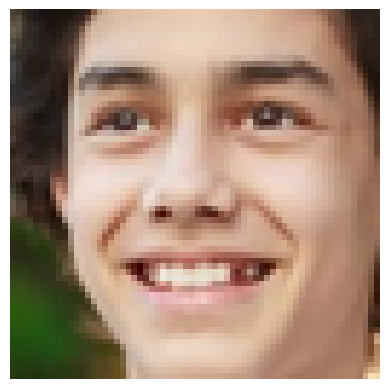

In [ ]:
image_index = 1000
gender_dict = {0:'Male', 1:'Female'}

# predict from model
pred = model.predict(X[image_index].reshape(1, 64, 64, 3))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print(f"Original Gender: {gender_dict[y_gender[image_index]]}, Original Age: {y_age[image_index]}")
print(f"Predicted Gender: {pred_gender}, Predicted Age: {pred_age}")
plt.axis('off')
plt.imshow(X[image_index]);

-------------------------------------------------------------------------------✈

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Hust/Age-Gender-Prediction"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Hust/Age-Gender-Prediction


In [9]:
import os

import tensorflow as tf
from tensorflow import keras

from PIL import Image, ImageOps
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("checkpoints/model.h5")
%cd "./testimg"

[WinError 2] The system cannot find the file specified: './testimg'
c:\Users\Admin\Desktop\HUST.AI.Project\Age-Gender-Prediction


In [13]:
%cd "../test-img/"
%ls

c:\Users\Admin\Desktop\HUST.AI.Project\test-img
 Volume in drive C is Dao Quang Duong
 Volume Serial Number is 94E6-1318

 Directory of c:\Users\Admin\Desktop\HUST.AI.Project\test-img

06/12/2022  04:22 CH    <DIR>          .
16/12/2022  03:37 CH    <DIR>          ..
06/12/2022  03:23 CH           101.882 evans.png
06/12/2022  03:17 CH            81.194 hermione.png
06/12/2022  03:29 CH           207.820 littlegirl.png
06/12/2022  03:08 CH            93.214 mixi.png
06/12/2022  03:22 CH            90.825 nguoiyeucu.png
06/12/2022  02:53 CH           188.804 phuong0.png
06/12/2022  02:57 CH           143.990 phuong1.png
06/12/2022  03:18 CH           108.811 thuytien.png
               8 File(s)      1.016.540 bytes
               2 Dir(s)  150.428.798.976 bytes free


In [14]:
def testimg(path): 
    img = load_img(path, grayscale=False)
    img = img.resize((64, 64), Image.ANTIALIAS)
    img = np.array(img)
    gender_dict = {0:'Male', 1:'Female'}

    # predict from model
    pred = model.predict(img.reshape(1, 64, 64, 3))
    pred_gender = gender_dict[round(pred[0][0][0])]
    pred_age = round(pred[1][0][0])

    print(f"Predicted Gender: {pred_gender}, Predicted Age: {(pred_age)}")
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    return

1/1 [==============================] - 0s 32ms/step
Predicted Gender: Female, Predicted Age: 18


c:\Users\Admin\miniconda3\envs\ai_prj\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


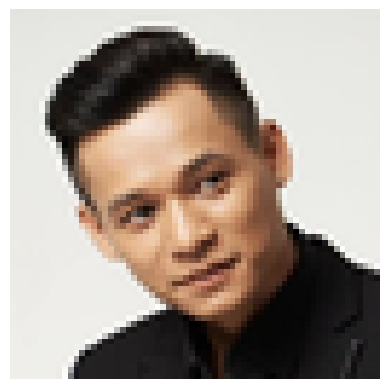

1/1 [==============================] - 0s 27ms/step
Predicted Gender: Female, Predicted Age: 11


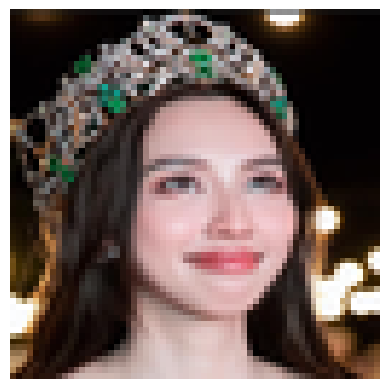

1/1 [==============================] - 0s 31ms/step
Predicted Gender: Male, Predicted Age: 11


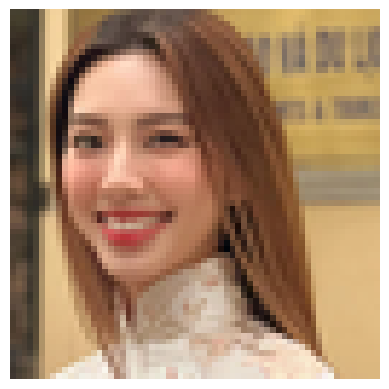

1/1 [==============================] - 0s 28ms/step
Predicted Gender: Female, Predicted Age: 12


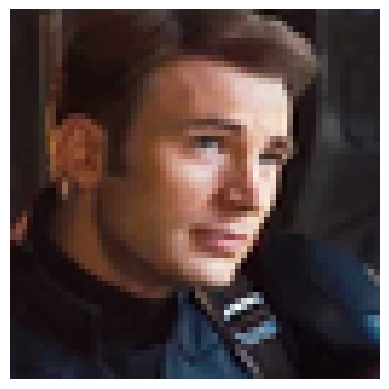

1/1 [==============================] - 0s 29ms/step
Predicted Gender: Female, Predicted Age: 4


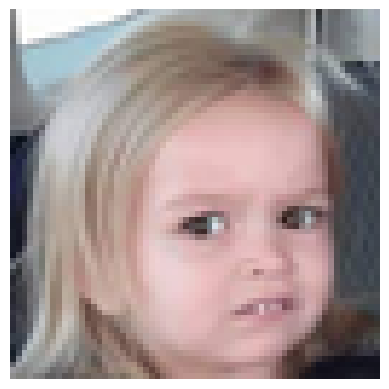

In [16]:
# testimg("phuong0.png")
# testimg("phuong1.png")
testimg("mixi.png")
testimg("thuytien.png")
testimg("nguoiyeucu.png")
testimg("evans.png")
testimg("littlegirl.png")
